In [50]:
import spotipy
spotify = spotipy.Spotify()
import sys
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests
import lxml
import spotfuncs 
%matplotlib inline

filepath = "C:/Users/epmmo/Documents/Spec/credentials.txt"

playlists = ["New Music Friday"]

for i in playlists:
    df = spotfuncs.get_spotify_playlist_data(playlist=i, credentials_file=filepath)
    df.to_csv("{0}.csv".format(i.replace(" ","_")))

In [18]:
df.head()

,album,artists,duration_ms,episode,explicit,href,id,is_local,name,popularity,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,valence
track_name,,,,,,,,,,,,,,,,,,,,,
Talk,Talk,"Khalid, Disclosure",197487,False,False,https://api.spotify.com/v1/tracks/0rTV5WefWd1J...,0rTV5WefWd1J3OwIheTzxM,False,Talk,0,...,0,0,0.0876,-8.443,1,0.124,136.001,4,https://api.spotify.com/v1/tracks/0rTV5WefWd1J...,0.338
"break up with your girlfriend, i'm bored","thank u, next",Ariana Grande,190440,False,True,https://api.spotify.com/v1/tracks/4kV4N9D1iKVx...,4kV4N9D1iKVxx1KLvtTpjS,False,"break up with your girlfriend, i'm bored",0,...,0,5,0.108,-5.489,0,0.102,169.991,4,https://api.spotify.com/v1/tracks/4kV4N9D1iKVx...,0.348
bad idea,"thank u, next",Ariana Grande,267106,False,False,https://api.spotify.com/v1/tracks/5Il6Oe7lr5XM...,5Il6Oe7lr5XM7A0cWbVQtr,False,bad idea,0,...,0.0477,1,0.116,-5.35,1,0.0651,138.024,4,https://api.spotify.com/v1/tracks/5Il6Oe7lr5XM...,0.568
Who Do You Love (with 5 Seconds of Summer),Who Do You Love (with 5 Seconds of Summer),"The Chainsmokers, 5 Seconds of Summer",226746,False,True,https://api.spotify.com/v1/tracks/11cDEev79fPK...,11cDEev79fPKi6uJCjUhu8,False,Who Do You Love (with 5 Seconds of Summer),0,...,0,3,0.219,-4.673,1,0.0447,140.024,4,https://api.spotify.com/v1/tracks/11cDEev79fPK...,0.435
BLACKJACK (feat. YBN Cordae) - Remix,BLACKJACK (Remix),"Aminé, YBN Cordae",163120,False,True,https://api.spotify.com/v1/tracks/59VNspSnCfoe...,59VNspSnCfoeGyNTGcSgsh,False,BLACKJACK (feat. YBN Cordae) - Remix,0,...,0,2,0.0581,-6.284,1,0.278,130.977,4,https://api.spotify.com/v1/tracks/59VNspSnCfoe...,0.891


In [65]:
df.columns

Index(['album', 'artists', 'duration_ms', 'episode', 'explicit', 'href', 'id',
       'is_local', 'name', 'popularity', 'preview_url', 'track',
       'track_number', 'type', 'uri', 'acousticness', 'analysis_url',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'valence'],
      dtype='object')

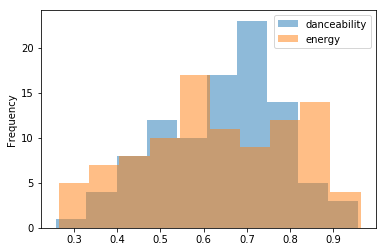

In [15]:
df.danceability.plot.hist(alpha = 0.5, legend = True)
df.energy.plot.hist(alpha = 0.5, legend = True)

In [87]:
df.duration_ms = pd.to_numeric(df.duration_ms)
df.acousticness = pd.to_numeric(df.acousticness)
df.danceability = pd.to_numeric(df.danceability)
#df.instrumentalness = pd.to_numeric(instrumentalness)
df.speechiness = pd.to_numeric(df.speechiness)
df.loudness = pd.to_numeric(df.loudness)
df.liveness = pd.to_numeric(df.liveness)
df.energy = pd.to_numeric(df.energy)
df.tempo = pd.to_numeric(df.tempo)
df.valence = pd.to_numeric(df.valence)
df.popularity = pd.to_numeric(df.popularity)

In [81]:
df.explicit = df.explicit.map({
    True: "Explicit",
    False: "Clean"
})

explicit
Clean       AxesSubplot(0.125,0.125;0.775x0.755)
Explicit    AxesSubplot(0.125,0.125;0.775x0.755)
Name: popularity, dtype: object

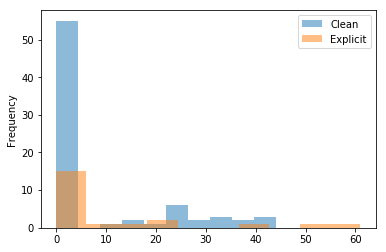

In [90]:
df.groupby("explicit").popularity.plot.hist(alpha=0.5, legend=True)

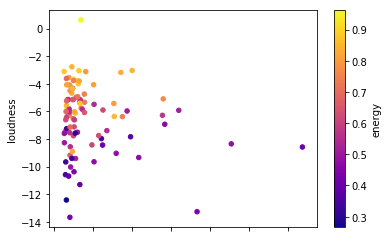

In [55]:
df.plot.scatter(x="speechiness", y="loudness", c="energy", cmap = "plasma")

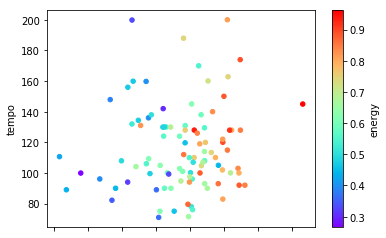

In [99]:
df.plot.scatter(x="loudness", y="tempo", c="energy", cmap = "rainbow")